# *SQL e Python no Mundo do Futebol e suas possíveis aplicações*

## <u>Com Python...<u/>

Para o algoritmo de regressão linear, utilizei um gráfico baseado no dataset carregado a seguir, para testar e avaliar o algoritmo

##### O que é Regressão Linear e pra que serve?
A regressão linear é um trabalho das áreas de estatística e econometria cujo objetivo principal está na análise de duas variáveis e seus respectivos resultados. Essa análise sempre parte de uma variável chamada de dependente com outras chamadas de independentes. Serve para encontrar relações entre essas variáveis de análise.

#### Importando todas as bibliotecas necessárias

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import joblib

%matplotlib inline
mpl.rcParams['figure.dpi']= 100

#### Leitura dos dataframes

In [2]:
df = pd.read_csv('adult2.csv',names=[
        "Idade", "Classe de Trabalho", "Peso Final", "Educacao", "Id_Educacao", "Estado Civil",
        "Ocupacao", "Relacao", "Raca", "Sexo", "Ganho de Capital", "Perda de Capital",
        "Horas-Por-Semana", "Nacionalidade", "Ganho Anual"], # Traduzindo colunas para o português
        sep=r'\s*;\s*',
        engine='python',
        na_values="?", skiprows = 1).dropna() # Linha de código feita para excluir linhas que contém dados faltantes
df

,Idade,Classe de Trabalho,Peso Final,Educacao,Id_Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas-Por-Semana,Nacionalidade,Ganho Anual
0,50,Trabalhador-nao-autonomo,83311,Bacharelado,13,Conjuge-civ-casado,Executivo-gerencial,Marido,Branco,Masculino,0,0,13,Brasil,<=25K
1,38,Privado,215646,Formado-EM,9,Divorciado,Limpeza,Nao-membro-da-familia,Branco,Masculino,0,0,40,Brasil,<=25K
2,53,Privado,234721,2-colegial,7,Conjuge-civ-casado,Limpeza,Marido,Negro,Masculino,0,0,40,Brasil,<=25K
3,28,Privado,338409,Bacharelado,13,Conjuge-civ-casado,Profissional-especializado,Esposa,Negro,Feminino,0,0,40,Brasil,<=25K
4,37,Privado,284582,Mestrado,14,Conjuge-civ-casado,Executivo-gerencial,Esposa,Branco,Feminino,0,0,40,Brasil,<=25K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Privado,257302,Associacao-academica,12,Conjuge-civ-casado,Suporte-Tecnico,Esposa,Branco,Feminino,0,0,38,Brasil,<=25K
32556,40,Privado,154374,Formado-EM,9,Conjuge-civ-casado,Operador-maquina,Marido,Branco,Masculino,0,0,40,Brasil,>25K
32557,58,Privado,151910,Formado-EM,9,Viuvo,Assistente-administrativo,Nao-casado,Branco,Feminino,0,0,40,Brasil,<=25K
32558,22,Privado,201490,Formado-EM,9,Nunca-casou,Assistente-administrativo,Filho-proprio,Branco,Masculino,0,0,20,Brasil,<=25K


## Gráficos
#### Exibindo alguns gráficos para uma melhor compreensão do nosso dataset de forma geral

Gráfico abaixo utilizado como base pra o algoritmo de regressão linear

### Idade (Gráfico idade X quantidade de pessoas)

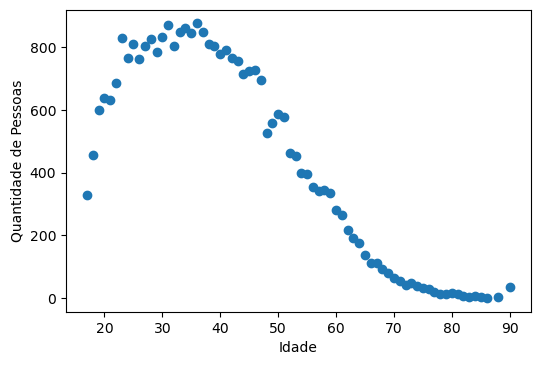

In [3]:
# Dicionário criado para o armazenamento de dados e para facilitar na hora de plotar o gráfico
idadeData = df['Idade'].value_counts().to_dict()

#Eixo X do gráfico
xAxis = [key for key in idadeData]

#Eixo Y do gráfico
yAxis = [idadeData[key] for key in idadeData]

# Gráfico de dispersão
plt.scatter(xAxis, yAxis)

# Legenda do eixo X
plt.xlabel('Idade')

# Legenda do eixo Y
plt.ylabel('Quantidade de Pessoas');

# Plotando o gráfico de idade vs Quantidade de Pessoas

### Aplicando o algoritmo de Regressão Linear

In [4]:
# Criando o dataset para regressão linear
df_reg = pd.DataFrame(list(zip(xAxis,yAxis)), columns = ['Idade','Quantidade de Pessoas'])
df_reg

,Idade,Quantidade de Pessoas
0,36,875
1,31,869
2,34,860
3,37,849
4,33,849
...,...,...
67,82,7
68,83,5
69,85,3
70,88,3


In [5]:
# Pegando os parâmetros para aplicar o algoritmo
X = df_reg['Idade'].values
Y = df_reg['Quantidade de Pessoas'].values

In [6]:
# Função Regressão Linear
linear = LinearRegression()

In [7]:
# Ajustando Valores de X
X = X.reshape([-1, 1])

In [8]:
# Ajustando parâmetros
linear.fit(X,Y)

LinearRegression()

In [9]:
# Treinando e testando o modelo
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 13)

In [10]:
# Ajustando parâmetros
linear.fit(X_test,y_test)

LinearRegression()

In [11]:
# Coeficiente angular 
coef_angular = linear.coef_[0]

In [12]:
# Coeficiente linear
coef_linear = linear.intercept_

In [13]:
print(f"Coeficiente angular = {coef_angular}")
print(f"Coeficiente linear = {coef_linear}")

Coeficiente angular = -16.25952175419111
Coeficiente linear = 1314.3263980909755


In [14]:
# Equação da reta
reta = coef_angular*X+coef_linear

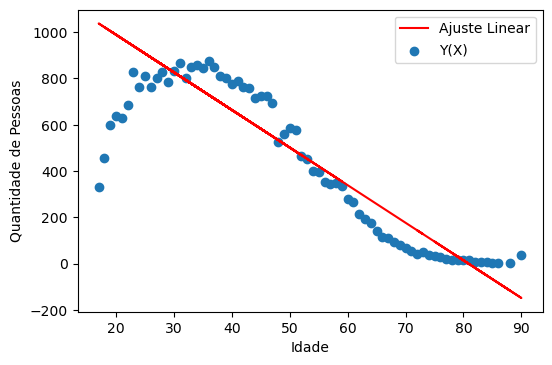

In [15]:
# Plotando a reta
plt.scatter(X,Y,label = 'Y(X)');
plt.plot(X,reta,label = 'Ajuste Linear',color = 'red')
plt.xlabel('Idade');
plt.ylabel('Quantidade de Pessoas');
plt.legend();

### Testando o algoritmo de Regressão Linear

In [16]:
# Valores preditos
Y_pred = linear.predict(X_test)
Y_pred

array([631.42648441, 972.87644125, 338.75509284, 647.68600617,
       306.23604933, -18.95438575, 468.83126687, -83.99247277,
       859.05978897, 241.19796231, 111.12178828, 712.72409319,
       615.16696266, 322.49557109, 436.31222336,  78.60274477,
        46.08370126, 728.98361494, 403.79317986, -67.73295102,
       777.7621802 ,  13.56465776])

In [17]:
# Valores reais
y_test

array([765, 631, 281, 790, 216,   7, 464,   1, 826, 113,  39, 849, 757,
       264, 399,  30,  14, 875, 353,   3, 849,  16], dtype=int64)

In [18]:
MAE = mean_absolute_error(Y,reta) # Média da diferença absoluta entre o realizado e o previso
RMSE = np.sqrt(mean_squared_error(Y,reta)) # Desvio padrão da amostra da diferença entre o previsto e o teste

print(f"MAE = {MAE}")
print(f"RMSE = {RMSE}")

MAE = 110.50907890854243
RMSE = 161.2353894994375


### Avaliando o algoritmo de Regressão Linear

In [19]:
linear.score(X_test,y_test)

0.8871617574335577

### Persistindo o algoritmo de Regressão Linear com o joblib  

In [20]:
# Joblib fornece uma maneira melhor de evitar recomputar a mesma função repetidamente, economizando muito tempo e 
# custo computacional.
arq_lin = 'LIN_SocioTorcedor.sav'
joblib.dump(linear,arq_lin)

['LIN_SocioTorcedor.sav']

#### Joblib fornece uma maneira melhor de evitar recomputar a mesma função repetidamente, economizando muito tempo e custo computacional.

In [21]:
lin_carregado = joblib.load(arq_lin)
resultado = lin_carregado.score(X_test, y_test)
print(resultado)

0.8871617574335577


#### ACURÁCIA FINAL = 88,7%

### Idade (Gráfico idade X % Pessoas que ganham mais ou menos que 25K)

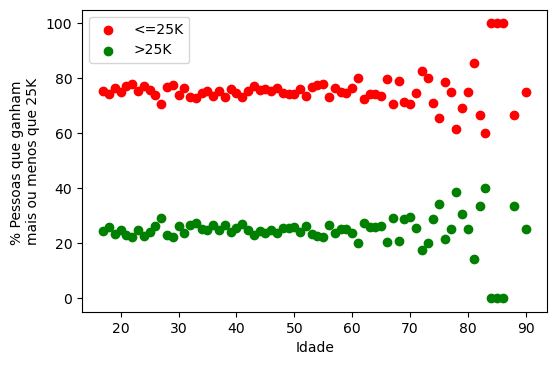

In [22]:
# Dicionário criado para relacionar a idade com o ganho anual de cada pessoa
idadeTargetData = {}

# laço for feito para separar dentro do dicionário as pessoas de acordo com o ganho anual  
for index, element in enumerate(df['Idade']):
    if index in df['Ganho Anual']:
        if element not in idadeTargetData:
            if df['Ganho Anual'][index] == '<=25K':
                idadeTargetData[element] = [1,0]
            else:
                idadeTargetData[element] = [0,1]
        else:
            if df['Ganho Anual'][index] == '<=25K':
                idadeTargetData[element][0] +=1
            else:
                idadeTargetData[element][1] += 1

# Eixo X
xAxis = [key for key in idadeTargetData]

# Eixo Y (Separado em dois, um para as pessoas que ganham menos de 25K, outro para as pessoas que ganham mais de 25K)
y1Axis = [100*idadeTargetData[key][0]/(idadeTargetData[key][0]+idadeTargetData[key][1]) for key in idadeTargetData]
y2Axis = [100*idadeTargetData[key][1]/(idadeTargetData[key][0]+idadeTargetData[key][1]) for key in idadeTargetData]

# Gráfico de dispersão vermelho relacionado às pessoas que ganham menos que 25K
plt.scatter(xAxis, y1Axis, label = '<=25K', color = 'red')

# Gráfico de dispersão verde relacionado às pessoas que ganham mais que 25K
plt.scatter(xAxis, y2Axis, label = '>25K', color = 'green')

# Plotar legenda
plt.legend()

# Legenda do eixo X
plt.xlabel('Idade')

# Legenda do eixo Y
plt.ylabel('% Pessoas que ganham \nmais ou menos que 25K');

# Plotando gráfico idade X % Pessoas que ganham mais ou menos que 25K

### Classe de Trabalho (Gráfico Classes de trabalho X Quantidade de pessoas)

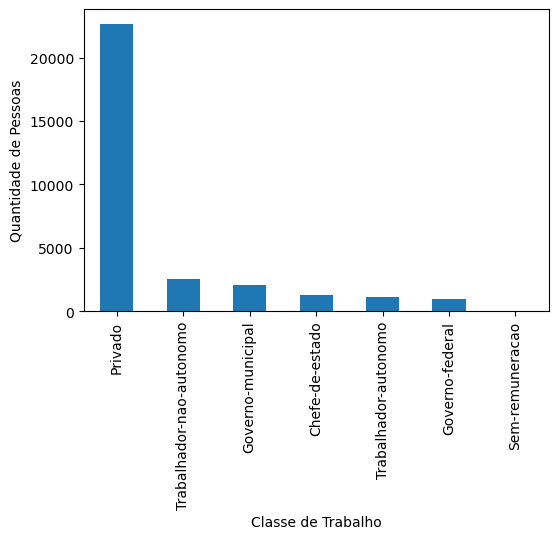

In [23]:
# Pegando os valores da coluna de classe de trabalho para cada classe
df['Classe de Trabalho'].value_counts().plot(kind='bar')

# Eixo X
plt.xlabel('Classe de Trabalho')

# Eixo Y
plt.ylabel('Quantidade de Pessoas');

# Plotando gráfico Classes de trabalho X Quantidade de pessoas

O mesmo procedimento é repetido pra os gráficos de Educação, Raça e Sexo

### Educação (Gráfico Formação educacional X Quantidade de pessoas)

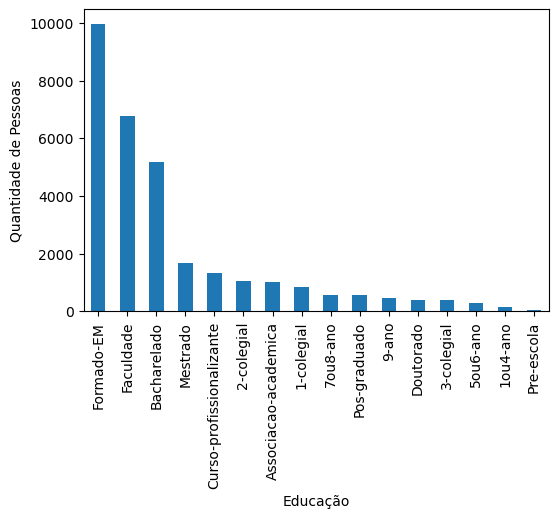

In [24]:
df['Educacao'].value_counts().plot(kind='bar')
plt.xlabel('Educação')
plt.ylabel('Quantidade de Pessoas');

### Raça (Gráfico Raças X Quantidade de pessoas)

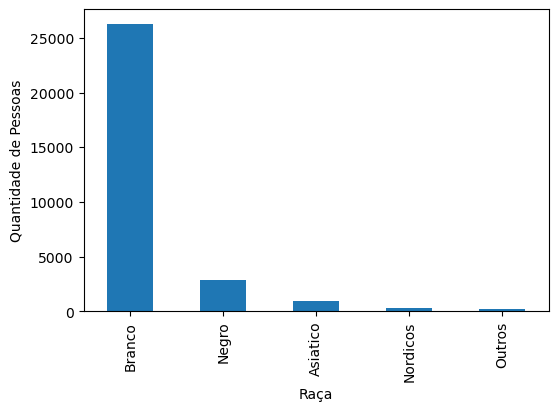

In [25]:
df['Raca'].value_counts().plot(kind='bar')
plt.xlabel('Raça')
plt.ylabel('Quantidade de Pessoas');

### Sexo

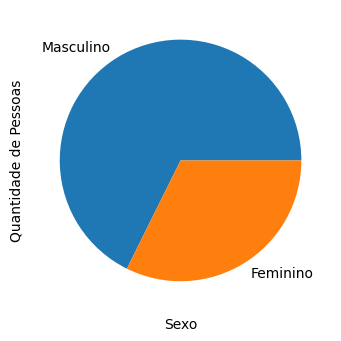

In [26]:
df['Sexo'].value_counts().plot(kind='pie')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Pessoas');

### Conclusão
Uma regressão linear deve ser usada basicamente quando se deseja realizar projeções e estudar a relação entre duas variáveis. No entanto, muitas vezes dada a natureza dos dados, não podemos estimar um modelo de regressão linear.